# Q5

The data files that you received contain monthly excess returns for five industry portfolios and the market portfolio. Let the market return be the target return. Using monthly return deviations for the five industry portfolios:

Calculate and report the expected return deviation and the tracking error, for the five industry portfolios and the global minimum-tracking-error portfolio.

Plot the minimum-tracking-error frontier generated by the five industry portfolios, with expected return deviation on the vertical axis and tracking error on the horizontal axis. This graph must cover the range from −0.06% to 0.1% per month, in increments of 0.005% (or less), on the vertical axis.

Calculate and report the information ratio and portfolio weights for the "tangency" portfolio where the tangent line (from the origin) intersects with the frontier.

Briefly explain (in words) the economic significance of this "tangency" portfolio

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
rf=0

In [3]:
Industry_Portfolio=pd.read_excel("Exam-Industry.xlsx",index_col=0)
Industry_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
190101,-1.34,4.20,3.01,-0.71,1.92
190102,2.89,4.87,3.45,3.33,2.63
190103,1.89,1.81,-0.83,2.29,-0.86
190104,4.36,2.58,3.16,6.37,1.11
190105,0.92,-2.55,-1.13,1.96,-2.40
...,...,...,...,...,...
190608,1.71,0.80,4.36,2.85,2.59
190609,-3.28,-2.84,-6.16,-6.01,-2.26
190610,8.63,6.01,6.74,2.25,7.25


In [4]:
Market_Portfolio=pd.read_excel("Exam–Market.xlsx",index_col=0)
Market_Portfolio

,Market
Date,
190101,1.99
190102,3.49
190103,0.46
190104,2.90
190105,-1.27
...,...
190608,2.91
190609,-4.37
190610,6.65


In [5]:
for i in Industry_Portfolio.columns:
    Industry_Portfolio[str(i)] = Industry_Portfolio[i].subtract(Market_Portfolio["Market"], fill_value=0)

In [6]:
Industry_Portfolio

,Cnsmr,Manuf,HiTec,Hlth,Other
Date,,,,,
190101,-3.33,2.21,1.02,-2.70,-0.07
190102,-0.60,1.38,-0.04,-0.16,-0.86
190103,1.43,1.35,-1.29,1.83,-1.32
190104,1.46,-0.32,0.26,3.47,-1.79
190105,2.19,-1.28,0.14,3.23,-1.13
...,...,...,...,...,...
190608,-1.20,-2.11,1.45,-0.06,-0.32
190609,1.09,1.53,-1.79,-1.64,2.11
190610,1.98,-0.64,0.09,-4.40,0.60


## Expected deviation from market return

In [7]:
Industry_Portfolio.mean(axis=0)

Cnsmr    0.054028
Manuf   -0.286250
HiTec    0.277222
Hlth     0.056944
Other   -0.028750
dtype: float64

## Covariance matrix of return deviation

In [8]:
R=pd.DataFrame(data=Industry_Portfolio.mean(axis=0))

V=Industry_Portfolio.cov()

V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

e = pd.DataFrame(data=np.ones((Industry_Portfolio.shape[1], 1)), 
                 index=Industry_Portfolio.columns, 
                 columns=["Dummy"])

In [9]:
# Compute Alpha
Alpha = (R.T @ V_inv @ e).values[0, 0]

# Compute Zeta
Zeta = (R.T @ V_inv @ R).values[0, 0]

# Compute Delta
Delta = (e.T @ V_inv @ e).values[0, 0]

In [10]:
# Compute Alpha
Alpha = (R.T @ V_inv @ e).values[0, 0]

# Compute Zeta
Zeta = (R.T @ V_inv @ R).values[0, 0]

# Compute Delta
Delta = (e.T @ V_inv @ e).values[0, 0]

In [11]:
# Compute 'a'
numerator_a1 = (Zeta * V_inv @ e)
numerator_a2 = (Alpha * V_inv @ R)
numerator_a = numerator_a1.values - numerator_a2.values
denominator_a = (Zeta * Delta) - Alpha**2
a = numerator_a / denominator_a

In [12]:
# Compute 'b'
numerator_b1 = (Delta * V_inv @ R)
numerator_b2 = (Alpha * V_inv @ e)
numerator_b = numerator_b1.values - numerator_b2.values
denominator_b = (Zeta * Delta) - Alpha**2
b = numerator_b / denominator_b

In [13]:
# Create the DataFrame with a range of portfolio RETURN DEVIATION as the index

returns_deviation_range = np.arange(-0.1, 0.1, 0.001)
Minimum_tracking_error_frontier = pd.DataFrame(index=returns_deviation_range, columns=Industry_Portfolio.columns)

# Fill the DataFrame with weights based on the formula
for portfolio_return in returns_deviation_range:
    weights = a + b * portfolio_return
    Minimum_tracking_error_frontier.loc[portfolio_return, :] = weights.T

In [14]:
Minimum_tracking_error_frontier 

,Cnsmr,Manuf,HiTec,Hlth,Other
-0.100,0.17886,0.485831,0.094912,0.116757,0.12364
-0.099,0.178825,0.483751,0.096452,0.116711,0.124261
-0.098,0.17879,0.481671,0.097992,0.116664,0.124883
-0.097,0.178755,0.479591,0.099532,0.116618,0.125505
-0.096,0.17872,0.47751,0.101073,0.116571,0.126126
...,...,...,...,...,...
0.095,0.172024,0.080197,0.395244,0.107675,0.24486
0.096,0.171989,0.078116,0.396784,0.107629,0.245482
0.097,0.171954,0.076036,0.398324,0.107582,0.246103
0.098,0.171919,0.073956,0.399864,0.107536,0.246725


In [15]:
# This is the expected return deviation for minimum tracking error portfolio

R_minimum_tracking_error=Alpha/Delta

In [16]:
# Variance for minimum tracking error portfolio

Variance_minimum_tracking_error=(1/Delta)
Variance_minimum_tracking_error

0.03410945709327468

In [17]:
# SD (Tracking error) for minimum tracking error portfolio

SD_minimum_tracking_error=np.sqrt(Variance_minimum_tracking_error)
SD_minimum_tracking_error

0.1846874578667287

In [18]:
# Information ratio for minimum tracking error portfolio

Information_ratio_minimum_tracking_error = (R_minimum_tracking_error-rf)/SD_minimum_tracking_error
Information_ratio_minimum_tracking_error

0.28238294320205326

In [19]:
# Weights for minimum tracking error portfolio

Weights_minimum_tracking_error=a+b*R_minimum_tracking_error

Weights_minimum_tracking_error_df = pd.DataFrame(data=Weights_minimum_tracking_error,
                                    index=Industry_Portfolio.columns,
                                    columns=["Weights_mv"])

Weights_minimum_tracking_error_df 

,Weights_mv
Cnsmr,0.173526
Manuf,0.169327
HiTec,0.329252
Hlth,0.109671
Other,0.218224


In [20]:
Minimum_tracking_error_frontier["Variance"]=(1/Delta)+(Delta/(Zeta*Delta-Alpha**2))*(Minimum_tracking_error_frontier.index-R_minimum_tracking_error)**2
Minimum_tracking_error_frontier["SD"]=np.sqrt(Minimum_tracking_error_frontier["Variance"])

In [21]:
Minimum_tracking_error_frontier 

,Cnsmr,Manuf,HiTec,Hlth,Other,Variance,SD
-0.100,0.17886,0.485831,0.094912,0.116757,0.12364,0.454483,0.674153
-0.099,0.178825,0.483751,0.096452,0.116711,0.124261,0.448975,0.670056
-0.098,0.17879,0.481671,0.097992,0.116664,0.124883,0.443504,0.665961
-0.097,0.178755,0.479591,0.099532,0.116618,0.125505,0.438069,0.661868
-0.096,0.17872,0.47751,0.101073,0.116571,0.126126,0.432671,0.657777
...,...,...,...,...,...,...,...
0.095,0.172024,0.080197,0.395244,0.107675,0.24486,0.067446,0.259704
0.096,0.171989,0.078116,0.396784,0.107629,0.245482,0.069021,0.262718
0.097,0.171954,0.076036,0.398324,0.107582,0.246103,0.070631,0.265765
0.098,0.171919,0.073956,0.399864,0.107536,0.246725,0.072278,0.268846


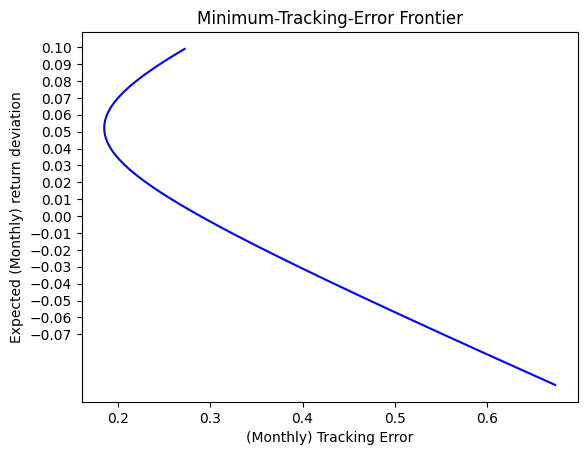

In [22]:
plt.plot(Minimum_tracking_error_frontier["SD"], Minimum_tracking_error_frontier.index, color='blue', linestyle='-')

#in increments of 0.1%
plt.yticks(np.arange(-0.07, 0.11, 0.01))
plt.xlabel('(Monthly) Tracking Error')
plt.ylabel('Expected (Monthly) return deviation')
plt.title('Minimum-Tracking-Error Frontier')
plt.show() 

In [23]:
# Note that the np.arrange is supposed to be portfolio Tracking Error (the x-axis)
Risk_free_line = rf + np.arange(0, 2, 0.001)*(Zeta-2*Alpha*rf+Delta*(rf**2))**0.5

In [24]:
Minimum_tracking_error_frontier["Riskless_Variance"]=((Minimum_tracking_error_frontier.index-rf)**2)/(Zeta - 2*Alpha*rf + Delta*(rf**2))
Minimum_tracking_error_frontier["Riskless_SD"]=np.sqrt(Minimum_tracking_error_frontier["Riskless_Variance"])
Minimum_tracking_error_frontier["Riskless_SD"] = (Minimum_tracking_error_frontier.index-rf)/np.sqrt(Zeta - 2*Alpha*rf + Delta*(rf**2))

In [25]:
Minimum_tracking_error_frontier 

,Cnsmr,Manuf,HiTec,Hlth,Other,Variance,SD,Riskless_Variance,Riskless_SD
-0.100,0.17886,0.485831,0.094912,0.116757,0.12364,0.454483,0.674153,0.074178,-0.272356
-0.099,0.178825,0.483751,0.096452,0.116711,0.124261,0.448975,0.670056,0.072702,-0.269633
-0.098,0.17879,0.481671,0.097992,0.116664,0.124883,0.443504,0.665961,0.071240,-0.266909
-0.097,0.178755,0.479591,0.099532,0.116618,0.125505,0.438069,0.661868,0.069794,-0.264185
-0.096,0.17872,0.47751,0.101073,0.116571,0.126126,0.432671,0.657777,0.068362,-0.261462
...,...,...,...,...,...,...,...,...,...
0.095,0.172024,0.080197,0.395244,0.107675,0.24486,0.067446,0.259704,0.066945,0.258738
0.096,0.171989,0.078116,0.396784,0.107629,0.245482,0.069021,0.262718,0.068362,0.261462
0.097,0.171954,0.076036,0.398324,0.107582,0.246103,0.070631,0.265765,0.069794,0.264185
0.098,0.171919,0.073956,0.399864,0.107536,0.246725,0.072278,0.268846,0.071240,0.266909


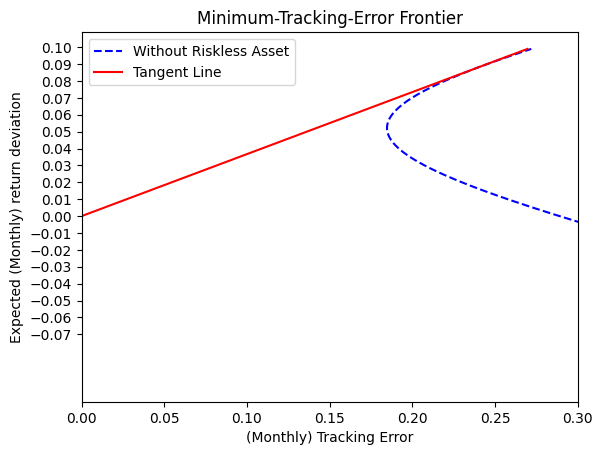

In [26]:
plt.plot(Minimum_tracking_error_frontier["SD"], Minimum_tracking_error_frontier.index, color='blue', linestyle='--', label = "Without Riskless Asset")
plt.plot(Minimum_tracking_error_frontier["Riskless_SD"], Minimum_tracking_error_frontier.index, color='red', linestyle='-', label = "Tangent Line")

plt.yticks(np.arange(-0.07, 0.11, 0.01))
plt.xlim(0,0.3)
plt.xlabel('(Monthly) Tracking Error')
plt.ylabel('Expected (Monthly) return deviation')
plt.title('Minimum-Tracking-Error Frontier')
plt.legend()
plt.show()

### Information ratio for the tangency portfolio

In [27]:
Information_ratio = np.sqrt(Zeta - 2*Alpha*rf + Delta*rf**2)
Information_ratio

0.3671664186819833

In [28]:
print (f'The Information ratio of the tangency portfolio is {Information_ratio:.3f}')

The Information ratio of the tangency portfolio is 0.367


In [29]:
# Return deviation of tangency portfolio

R_tg = (Alpha*rf - Zeta)/(Delta*rf - Alpha)
R_tg

0.08817081393313222

In [30]:
# Variance of return deviation for tangency portfolio

Variance_tg=(Zeta-2*Alpha*rf+Delta*rf**2)/((Delta**2)*(rf-R_minimum_tracking_error)**2)
Variance_tg

0.05766652652139412

In [31]:
# Standard Deviation of return deviation (Tracking error) for tangency portfolio

StdDev_tg=-((Zeta-2*Alpha*rf+Delta*rf**2)**0.5)/(Delta*(rf-R_minimum_tracking_error))
StdDev_tg

0.2401385569236938

In [32]:
w_star = a + b*R_tg

In [33]:
Tangency_portfolio=pd.DataFrame(data=w_star,index=Industry_Portfolio.columns,columns=["Optimal_Weights"])
Tangency_portfolio

,Optimal_Weights
Cnsmr,0.172263
Manuf,0.094403
HiTec,0.384726
Hlth,0.107993
Other,0.240615


# Briefly explain (in words) the economic significance of this "tangency" portfolio

The tangency portfolio is the portfolio with the best (highest) information ratio. The information ratio measures the expected return deviation (excess return over the benchmark, in this case, the market portfolio) relative to its tracking error (volatility of excess returns). The tangency portfolio maximizes this ratio, meaning it achieves the highest excess return per unit of tracking error and represents the most efficient risk-adjusted portfolio relative to the benchmark. This is why it is often considered optimal for active management strategies seeking to outperform a benchmark.

The tangency portfolio represents the optimal trade-off between tracking error and expected return deviation from the market. This portfolio maximizes risk-adjusted excess returns relative to the benchmark and indicates the best diversification strategy for achieving superior returns while maintaining low deviation from market performance.